In [177]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Ćwiczenie 5.

1. wyświetlanie obrazu wczytanego z pliku o podanej nazwie,

In [178]:
def load_image(nazwa, type=None):
    return cv2.imread('images/{}.jpg'.format(nazwa)) if type is None else cv2.imread('images/{}.jpg'.format(nazwa),0)

def display_image(image, subimage_defined_bounderies=[0,10000,0,10000,]):
    obraz_c = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(obraz_c[subimage_defined_bounderies[0]:subimage_defined_bounderies[1],subimage_defined_bounderies[2]:subimage_defined_bounderies[3]])

2. sporządzenie wykresów zmian poziomu szarości wzdłuż wybranej linii poziomej
lub pionowej o zadanej współrzędnej,

In [179]:
lion = load_image('lion')
lion_mono = load_image('lion', 0)
rabbits = load_image('rabbits')
rabbits_mono = load_image('rabbits',0)
squirrel = load_image('squirrel')
squirrel_mono = load_image('squirrel',0)

3. wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego
zapis do pliku o zadanej nazwie.

In [180]:
def save_image(image, filename, subimage_defined_bounderies=[0,10000,0,10000]):
    cv2.imwrite('images/{}.jpg'.format(filename),image[subimage_defined_bounderies[0]:subimage_defined_bounderies[1],subimage_defined_bounderies[2]:subimage_defined_bounderies[3]])

Ćwiczenie 6.

a) Mnożenie obrazu przez stałą T (r) = c · r, gdzie c jest stałą

In [181]:
def image_multiplying(image, constant):
    if image is not None:
        image_const = (image.copy()).astype(np.uint16)
        image_const = np.clip(image_const * constant, 0, 255)
        return image_const.astype('uint8')
    return image

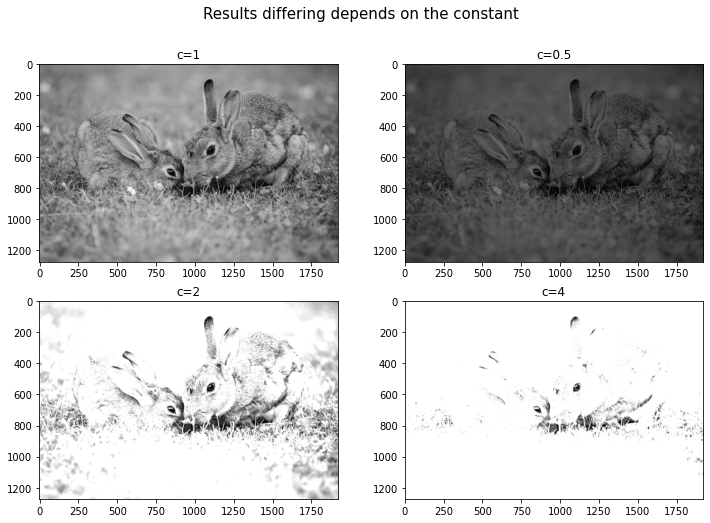

In [182]:
plt.figure(figsize=(12,8))
plt.suptitle('Results differing depends on the constant', fontsize=15)

plt.subplot(2,2,1)
rabbits_consts = image_multiplying(rabbits_mono,1)
display_image(rabbits_consts)
plt.title('c=1')

plt.subplot(2,2,2)
rabbits_consts = image_multiplying(rabbits_mono,0.5)
display_image(rabbits_consts)
plt.title('c=0.5');

plt.subplot(2,2,3)
rabbits_consts = image_multiplying(rabbits_mono,2)
display_image(rabbits_consts)
plt.title('c=2');

plt.subplot(2,2,4)
rabbits_consts = image_multiplying(rabbits_mono,4)
display_image(rabbits_consts)
plt.title('c=4');

b) Zmianę dynamiki skali szarości (kontrastu). Możesz zastosować transformację
o postaci
T (r) = 1
1 + (m/r)e
gdzie m i e są ustalonymi parametrami przekształcenia (np. m = 0,45, e = 8).
Wykreśl T (r), by lepiej uwidocznić wpływ T na kontrast obrazu wyjściowego.
Przeprowadź eksperymenty z różnymi wartościami parametrów m i e.

In [207]:
def change_of_dynamic(image, m, e):
    if image is not None:
        return (255/(1+np.power(m/(image.copy()/255.0),e))).astype('uint8')

/tmp/ipykernel_18296/421020551.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return (255/(1+np.power(m/(image.copy()/255.0),e))).astype('uint8')


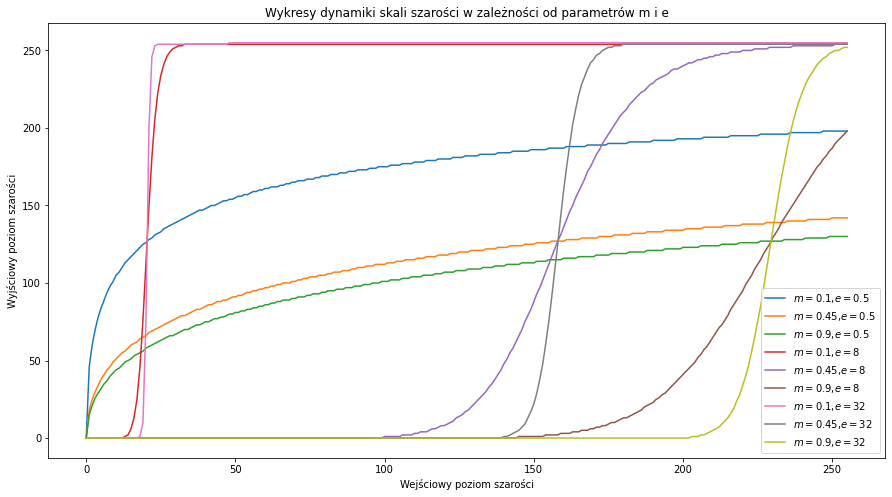

In [209]:
wejscie=np.arange(0,256)
wyjscie_01_2 = change_of_dynamic(wejscie,0.08,0.5)
wyjscie_045_2 = change_of_dynamic(wejscie,0.62,0.5)
wyjscie_09_2 = change_of_dynamic(wejscie,0.9,0.5)
wyjscie_01_8 = change_of_dynamic(wejscie,0.08,12)
wyjscie_045_8 = change_of_dynamic(wejscie,0.62,12)
wyjscie_09_8 = change_of_dynamic(wejscie,0.9,12)
wyjscie_01_32 = change_of_dynamic(wejscie,0.08,44)
wyjscie_045_32 = change_of_dynamic(wejscie,0.62,44)
wyjscie_09_32 = change_of_dynamic(wejscie,0.9,44)

plt.figure(figsize=(15,8))
plt.title("Graynes dynamic in relation to m and e parameters")
plt.xlabel("Wejściowy poziom szarości")
plt.ylabel("Wyjściowy poziom szarości")

plt.plot(wejscie, wyjscie_01_2, label='$m=0.1$,$e=0.5$')
plt.plot(wejscie, wyjscie_045_2, label='$m=0.45$,$e=0.5$')
plt.plot(wejscie, wyjscie_09_2, label='$m=0.9$,$e=0.5$')
plt.plot(wejscie, wyjscie_01_8, label='$m=0.1$,$e=8$')
plt.plot(wejscie, wyjscie_045_8, label='$m=0.45$,$e=8$')
plt.plot(wejscie, wyjscie_09_8, label='$m=0.9$,$e=8$')
plt.plot(wejscie, wyjscie_01_32, label='$m=0.1$,$e=32$')
plt.plot(wejscie, wyjscie_045_32, label='$m=0.45$,$e=32$')
plt.plot(wejscie, wyjscie_09_32, label='$m=0.9$,$e=32$')

plt.legend( bbox_to_anchor=(0.5, 0., 0.5, 0.5));

c) Korekcję gamma, zdefiniowaną jako s = c · rγ, gdzie c > 0 i γ > 0 są stałymi
we wzorze przekształcenia.

Ćwiczenie 7. Wypróbuj działanie wyrównywania histogramu na przykładowych
obrazach. By zaobserwować skuteczność procedury, poddaj wyrównywaniu obrazy
zbyt ciemne i zbyt jasne. Narysować histogramy obrazów przed i po wyrównaniu.

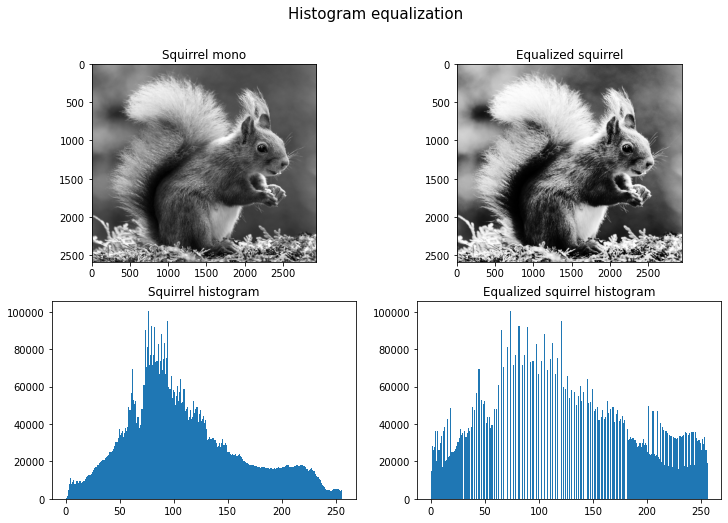

In [184]:
plt.figure(figsize=(12,8))
plt.suptitle('Histogram equalization', fontsize=15)

plt.subplot(2,2,1)
display_image(squirrel_mono)
plt.title('Squirrel mono')

plt.subplot(2,2,2)
squirrel_equalized = cv2.equalizeHist(squirrel_mono)
display_image(squirrel_equalized)
plt.title('Equalized squirrel')

plt.subplot(2,2,3)
plt.hist(squirrel_mono.ravel(),256,[0,256]);
plt.title('Squirrel histogram')

plt.subplot(2,2,4)
plt.hist(squirrel_equalized.ravel(),256,[0,256]);
plt.title('Equalized squirrel histogram');

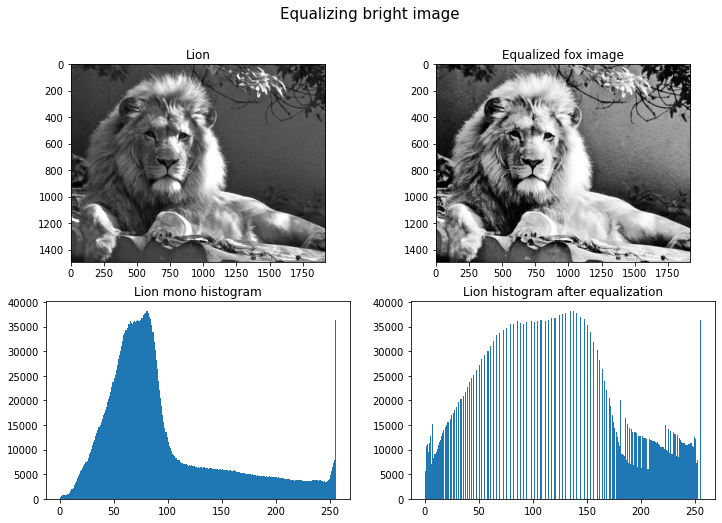

In [185]:
plt.figure(figsize=(12,8))
plt.suptitle('Equalizing bright image', fontsize=15)

plt.subplot(2,2,1)
display_image(lion_mono)
plt.title('Lion')

plt.subplot(2,2,2)
lion_mono_e = cv2.equalizeHist(lion_mono)
display_image(lion_mono_e)
plt.title('Equalized fox image')

plt.subplot(2,2,3)
plt.hist(lion_mono.ravel(),256,[0,256]);
plt.title('Lion mono histogram');

plt.subplot(2,2,4)
plt.hist(lion_mono_e.ravel(),256,[0,256]);
plt.title('Lion histogram after equalization');


Ćwiczenie 8.

a) liniowego filtra uśredniającego z kwadratową maską, rozpoczynając od maski
rozmiaru 3 × 3

In [186]:
def linear_filter(img, mask_size = 3):
    img = cv2.blur(img, (mask_size,mask_size))
    return img

Text(0.5, 1.0, 'Mask 25')

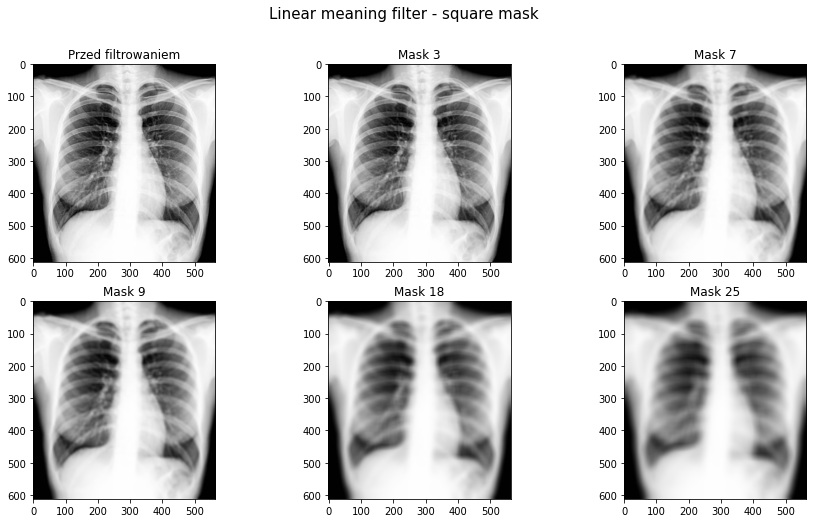

In [187]:
plt.figure(figsize=(15,8))
plt.suptitle('Linear meaning filter - square mask ', fontsize=15)

plt.subplot(2,3,1)
s_p = wczytaj_obraz('xray_lungs',0)
display_image(s_p)
plt.title('Przed filtrowaniem')

plt.subplot(2,3,2)
s_p_3 = linear_filter(s_p,3)
display_image(s_p_3)
plt.title('Mask 3')

plt.subplot(2,3,3)
s_p_5 = linear_filter(s_p,7)
display_image(s_p_5)
plt.title('Mask 7')

plt.subplot(2,3,4)
s_p_7 = linear_filter(s_p,9)
display_image(s_p_7)
plt.title('Mask 9')

plt.subplot(2,3,5)
s_p_13 = linear_filter(s_p,18)
display_image(s_p_13)
plt.title('Mask 18')

plt.subplot(2,3,6)
s_p_23 = linear_filter(s_p,25)
display_image(s_p_23)
plt.title('Mask 25')

b) nieliniowego filtra medianowego.

In [191]:
def nonlinar_filter(image, mask_size = 3 ):
    image = cv2.medianBlur(image, mask_size)
    return image

Text(0.5, 1.0, 'Mask 25')

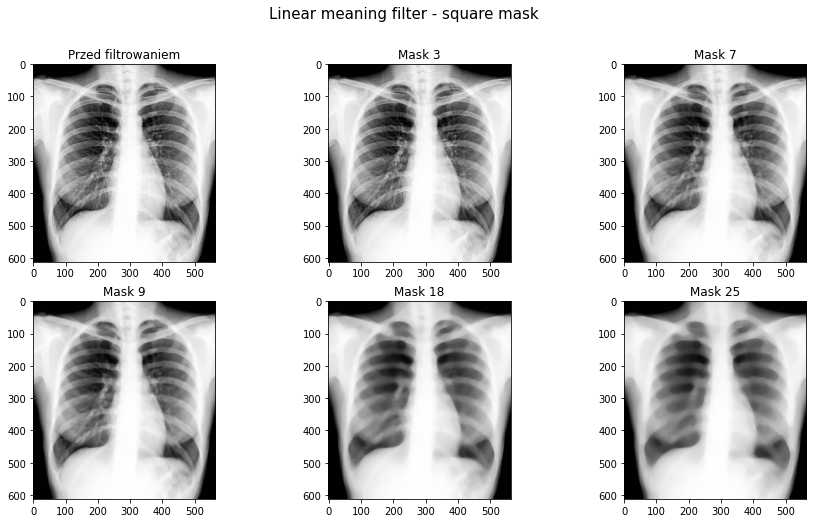

In [193]:
plt.figure(figsize=(15,8))
plt.suptitle('Linear meaning filter - square mask ', fontsize=15)

plt.subplot(2,3,1)
s_p = load_image('xray_lungs',0)
display_image(s_p)
plt.title('Przed filtrowaniem')

plt.subplot(2,3,2)
s_p_3 = nonlinar_filter(s_p,3)
display_image(s_p_3)
plt.title('Mask 3')

plt.subplot(2,3,3)
s_p_5 = nonlinar_filter(s_p,7)
display_image(s_p_5)
plt.title('Mask 7')

plt.subplot(2,3,4)
s_p_7 = nonlinar_filter(s_p,9)
display_image(s_p_7)
plt.title('Mask 9')

plt.subplot(2,3,5)
s_p_13 = nonlinar_filter(s_p,19)
display_image(s_p_13)
plt.title('Mask 19')

plt.subplot(2,3,6)
s_p_23 = nonlinar_filter(s_p,25)
display_image(s_p_23)
plt.title('Mask 25')

Moim zdaniem wygląda to znacznie lepiej niż filtr liniowy